In [1]:
import numpy as np
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('Micro_credit_card_sample_data.csv')
df.head()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,1,1,4022154989,155,2111.000000,3018.71,0.00,267.60,50,NaN,...,12,2.0,1,12,12,2.0,NaN,NaN,UPW,2016-08-12
1,2,1,8984212438,137,18017.682000,18052.41,629.92,749.92,13,NaN,...,12,0.0,4,30,12,0.0,4.0,3.0,UPW,2016-07-24
2,3,0,6356838509,122,5662.625333,5672.28,467.24,518.46,2,NaN,...,6,0.0,3,18,6,0.0,13.0,13.0,UPW,2016-07-13
3,4,1,1169470878,144,4288.500000,4313.48,4647.51,4765.11,23,NaN,...,6,0.5,2,12,6,0.5,NaN,NaN,UPW,2016-07-30
4,5,1,1292895185,94,1618.800000,1634.75,1096.49,1059.71,1,NaN,...,6,0.5,2,12,6,0.5,NaN,NaN,UPW,2016-07-06


In [3]:
df.isnull()

,Unnamed: 0,label,msisdn,aon,daily_decr30,daily_decr90,rental30,rental90,last_rech_date_ma,last_rech_date_da,...,maxamnt_loans30,medianamnt_loans30,cnt_loans90,amnt_loans90,maxamnt_loans90,medianamnt_loans90,payback30,payback90,pcircle,pdate
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
1,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,True,True,False,False
5,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False


In [4]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       6
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            1
sumamnt_ma_rech30       0
medianamnt_ma_rech30    1
medianmarechprebal30    1
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            6
cnt_da_rech90           0
fr_da_rech90            6
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               3
payback90               3
pcircle                 0
pdate                   0
dtype: int64

In [5]:
df['last_rech_date_da'].fillna(0, inplace = True)

In [6]:
df['last_rech_date_da']

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: last_rech_date_da, dtype: float64

In [7]:
df['fr_ma_rech30']

0    NaN
1      8
2      0
3     NA
4     29
5      2
Name: fr_ma_rech30, dtype: object

In [8]:
df['fr_ma_rech30'] = pd.to_numeric(df['fr_ma_rech30'], errors='coerce')

# Fill NaN values with the mean of the column
df['fr_ma_rech30'].fillna(df['fr_ma_rech30'].mean(), inplace=True)

In [9]:
df['fr_ma_rech30']

0     9.75
1     8.00
2     0.00
3     9.75
4    29.00
5     2.00
Name: fr_ma_rech30, dtype: float64

In [10]:
df['medianamnt_ma_rech30'].fillna(df['medianamnt_ma_rech30'].mean(), inplace = True)

In [11]:
df['medianamnt_ma_rech30']

0    2659.6
1    5787.0
2    1539.0
3    1539.0
4    3663.0
5     770.0
Name: medianamnt_ma_rech30, dtype: float64

In [12]:
df['medianmarechprebal30'].fillna(df['medianmarechprebal30'].mean(), inplace = True)

In [13]:
df['medianmarechprebal30']

0     63.1
1     64.0
2    111.0
3     82.0
4      7.0
5     51.5
Name: medianmarechprebal30, dtype: float64

In [14]:
df['fr_da_rech30'].fillna(0, inplace = True)

In [15]:
df['fr_da_rech30']

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: fr_da_rech30, dtype: float64

In [16]:
df['payback30'].fillna(df['payback30'].mean(), inplace = True)

In [17]:
df['payback30']

0     7.0
1     4.0
2    13.0
3     7.0
4     7.0
5     4.0
Name: payback30, dtype: float64

In [18]:
df['payback90'].fillna(value = round(df['payback90'].mean()), inplace = True)

In [19]:
df['payback90']

0     7.0
1     3.0
2    13.0
3     7.0
4     7.0
5     4.0
Name: payback90, dtype: float64

In [20]:
df['fr_da_rech90'].fillna(0, inplace = True)

In [21]:
df['fr_da_rech90']

0    0.0
1    0.0
2    0.0
3    0.0
4    0.0
5    0.0
Name: fr_da_rech90, dtype: float64

In [22]:
df.isnull().sum()

Unnamed: 0              0
label                   0
msisdn                  0
aon                     0
daily_decr30            0
daily_decr90            0
rental30                0
rental90                0
last_rech_date_ma       0
last_rech_date_da       0
last_rech_amt_ma        0
cnt_ma_rech30           0
fr_ma_rech30            0
sumamnt_ma_rech30       0
medianamnt_ma_rech30    0
medianmarechprebal30    0
cnt_ma_rech90           0
fr_ma_rech90            0
sumamnt_ma_rech90       0
medianamnt_ma_rech90    0
medianmarechprebal90    0
cnt_da_rech30           0
fr_da_rech30            0
cnt_da_rech90           0
fr_da_rech90            0
cnt_loans30             0
amnt_loans30            0
maxamnt_loans30         0
medianamnt_loans30      0
cnt_loans90             0
amnt_loans90            0
maxamnt_loans90         0
medianamnt_loans90      0
payback30               0
payback90               0
pcircle                 0
pdate                   0
dtype: int64

In [22]:
plt.hist?

Signature:
plt.hist(
    x: 'ArrayLike | Sequence[ArrayLike]',
    bins: 'int | Sequence[float] | str | None' = None,
    range: 'tuple[float, float] | None' = None,
    density: 'bool' = False,
    weights: 'ArrayLike | None' = None,
    cumulative: 'bool | float' = False,
    bottom: 'ArrayLike | float | None' = None,
    histtype: "Literal['bar', 'barstacked', 'step', 'stepfilled']" = 'bar',
    align: "Literal['left', 'mid', 'right']" = 'mid',
    orientation: "Literal['vertical', 'horizontal']" = 'vertical',
    rwidth: 'float | None' = None,
    log: 'bool' = False,
    color: 'ColorType | Sequence[ColorType] | None' = None,
    label: 'str | Sequence[str] | None' = None,
    stacked: 'bool' = False,
    *,
    data=None,
    **kwargs,
) -> 'tuple[np.ndarray | list[np.ndarray], np.ndarray, BarContainer | Polygon | list[BarContainer | Polygon]]'
Docstring:
Compute and plot a histogram.

This method uses `numpy.histogram` to bin the data in *x* and count the
number of values in eac

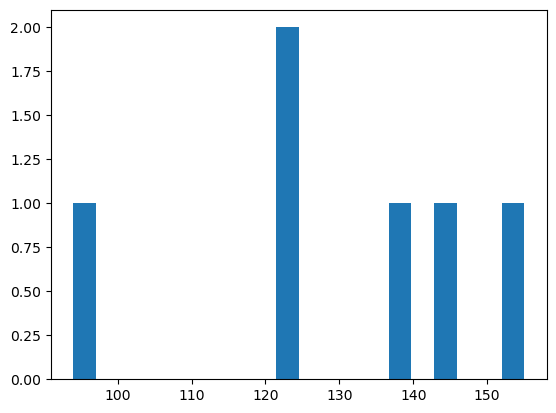

In [23]:
plt.hist(df['aon'], bins = 20)
plt.show()

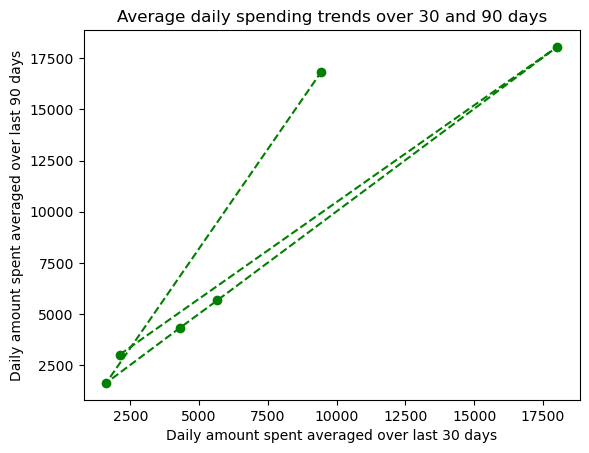

In [24]:
plt.plot(df['daily_decr30'],df['daily_decr90'], color = 'green', marker = 'o',linestyle = 'dashed')
plt.xlabel('Daily amount spent averaged over last 30 days')
plt.ylabel('Daily amount spent averaged over last 90 days')
plt.title('Average daily spending trends over 30 and 90 days')
plt.show()

In [25]:
plt.boxplot?

Signature:
plt.boxplot(
    x: 'ArrayLike | Sequence[ArrayLike]',
    notch: 'bool | None' = None,
    sym: 'str | None' = None,
    vert: 'bool | None' = None,
    whis: 'float | tuple[float, float] | None' = None,
    positions: 'ArrayLike | None' = None,
    widths: 'float | ArrayLike | None' = None,
    patch_artist: 'bool | None' = None,
    bootstrap: 'int | None' = None,
    usermedians: 'ArrayLike | None' = None,
    conf_intervals: 'ArrayLike | None' = None,
    meanline: 'bool | None' = None,
    showmeans: 'bool | None' = None,
    showcaps: 'bool | None' = None,
    showbox: 'bool | None' = None,
    showfliers: 'bool | None' = None,
    boxprops: 'dict[str, Any] | None' = None,
    labels: 'Sequence[str] | None' = None,
    flierprops: 'dict[str, Any] | None' = None,
    medianprops: 'dict[str, Any] | None' = None,
    meanprops: 'dict[str, Any] | None' = None,
    capprops: 'dict[str, Any] | None' = None,
    whiskerprops: 'dict[str, Any] | None' = None,
    manage_ticks:

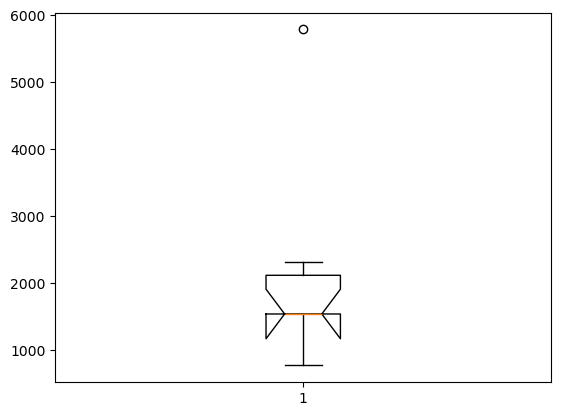

In [26]:
plt.boxplot(df['last_rech_amt_ma'],notch = 'bool')
plt.show()

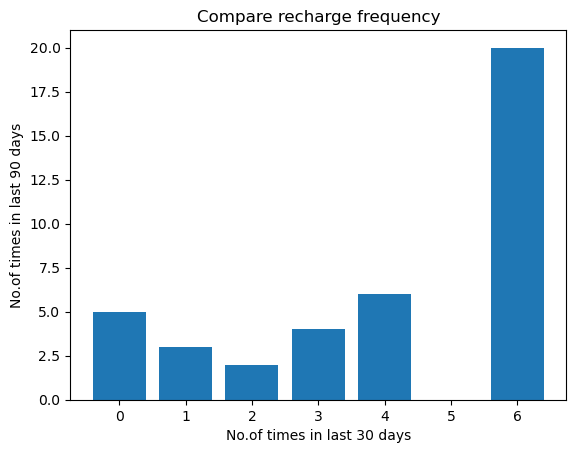

In [27]:
plt.bar(df['cnt_ma_rech30'],df['cnt_ma_rech90'])
plt.xlabel('No.of times in last 30 days')
plt.ylabel('No.of times in last 90 days')
plt.title('Compare recharge frequency')
plt.show()

In [28]:
plt.bar?

Signature:
plt.bar(
    x: 'float | ArrayLike',
    height: 'float | ArrayLike',
    width: 'float | ArrayLike' = 0.8,
    bottom: 'float | ArrayLike | None' = None,
    *,
    align: "Literal['center', 'edge']" = 'center',
    data=None,
    **kwargs,
) -> 'BarContainer'
Docstring:
Make a bar plot.

The bars are positioned at *x* with the given *align*\ment. Their
dimensions are given by *height* and *width*. The vertical baseline
is *bottom* (default 0).

Many parameters can take either a single value applying to all bars
or a sequence of values, one for each bar.

Parameters
----------
x : float or array-like
    The x coordinates of the bars. See also *align* for the
    alignment of the bars to the coordinates.

height : float or array-like
    The height(s) of the bars.

    Note that if *bottom* has units (e.g. datetime), *height* should be in
    units that are a difference from the value of *bottom* (e.g. timedelta).

width : float or array-like, default: 0.8
    The width(s) 

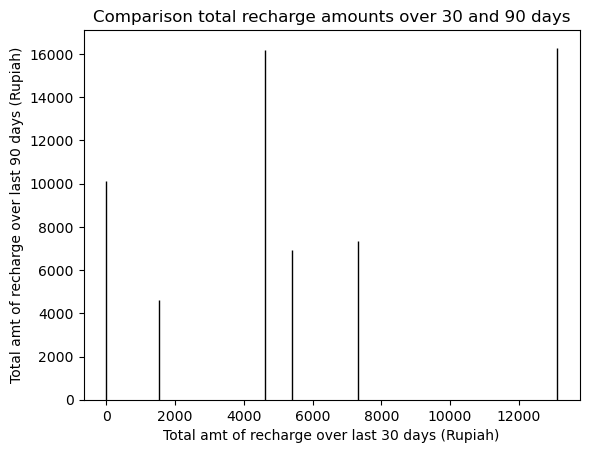

In [29]:
plt.bar(df['sumamnt_ma_rech30'],df['sumamnt_ma_rech90'],edgecolor = 'black')
plt.xlabel('Total amt of recharge over last 30 days (Rupiah)')
plt.ylabel('Total amt of recharge over last 90 days (Rupiah)')
plt.title('Comparison total recharge amounts over 30 and 90 days')
plt.show()

In [33]:
plt.boxplot?

Signature:
plt.boxplot(
    x: 'ArrayLike | Sequence[ArrayLike]',
    notch: 'bool | None' = None,
    sym: 'str | None' = None,
    vert: 'bool | None' = None,
    whis: 'float | tuple[float, float] | None' = None,
    positions: 'ArrayLike | None' = None,
    widths: 'float | ArrayLike | None' = None,
    patch_artist: 'bool | None' = None,
    bootstrap: 'int | None' = None,
    usermedians: 'ArrayLike | None' = None,
    conf_intervals: 'ArrayLike | None' = None,
    meanline: 'bool | None' = None,
    showmeans: 'bool | None' = None,
    showcaps: 'bool | None' = None,
    showbox: 'bool | None' = None,
    showfliers: 'bool | None' = None,
    boxprops: 'dict[str, Any] | None' = None,
    labels: 'Sequence[str] | None' = None,
    flierprops: 'dict[str, Any] | None' = None,
    medianprops: 'dict[str, Any] | None' = None,
    meanprops: 'dict[str, Any] | None' = None,
    capprops: 'dict[str, Any] | None' = None,
    whiskerprops: 'dict[str, Any] | None' = None,
    manage_ticks:

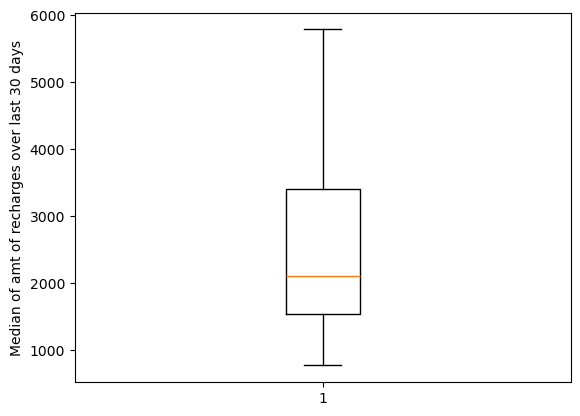

In [38]:
plt.boxplot(df['medianamnt_ma_rech30'])
plt.ylabel('Median of amt of recharges over last 30 days')
plt.show()

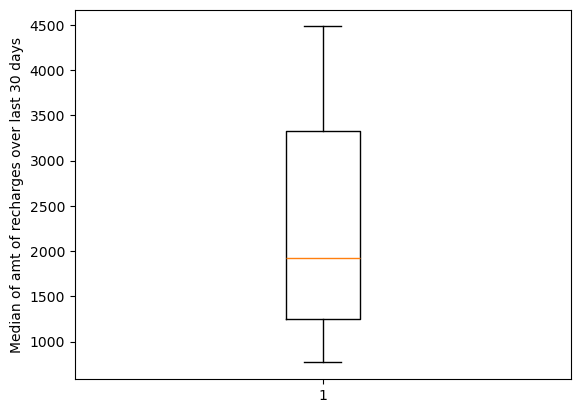

In [39]:
plt.boxplot(df['medianamnt_ma_rech90'])
plt.ylabel('Median of amt of recharges over last 30 days')
plt.show()

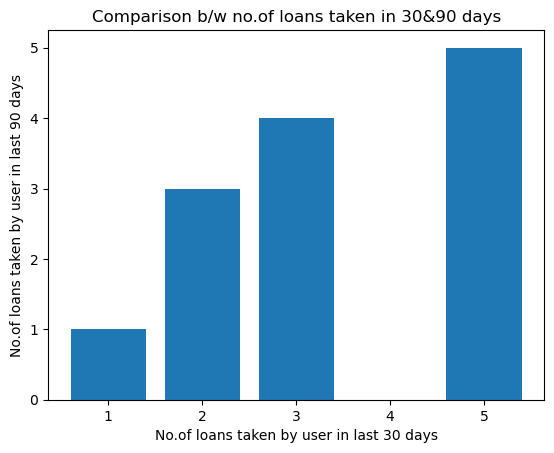

In [40]:
plt.bar(df['cnt_loans30'],df['cnt_loans90'])
plt.xlabel('No.of loans taken by user in last 30 days')
plt.ylabel('No.of loans taken by user in last 90 days')
plt.title('Comparison b/w no.of loans taken in 30&90 days')
plt.show()

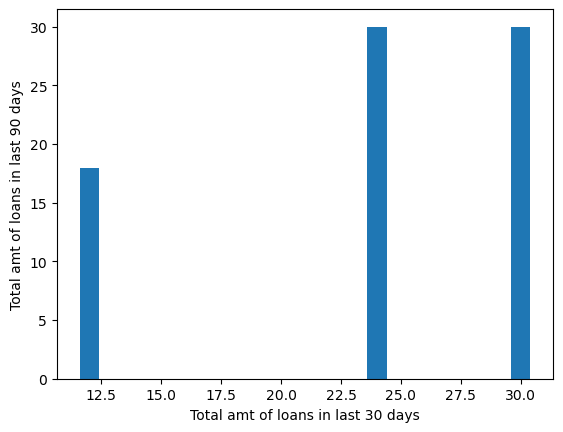

In [41]:
plt.bar(df['amnt_loans30'],df['amnt_loans90'])
plt.xlabel('Total amt of loans in last 30 days')
plt.ylabel('Total amt of loans in last 90 days')
plt.show()

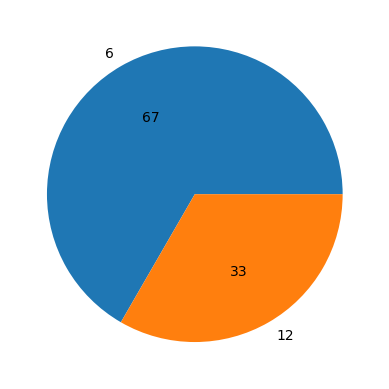

In [45]:
plt.pie(df['maxamnt_loans30'].value_counts(),labels = df['maxamnt_loans30'].value_counts().index,autopct = '%0.0f')
plt.show()

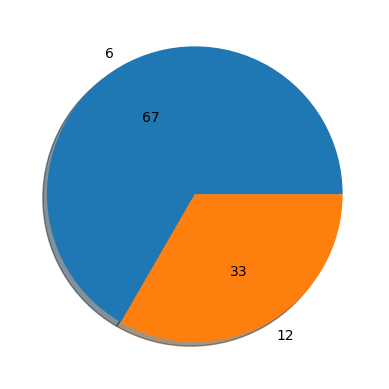

In [46]:
plt.pie(df['maxamnt_loans90'].value_counts(),labels = df['maxamnt_loans90'].value_counts().index, autopct = '%0.0f',shadow = True,explode = [0,0])
plt.show()

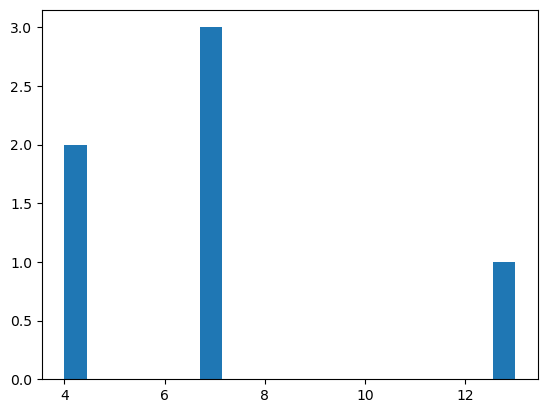

In [50]:
plt.hist(df['payback30'], bins = 20)
plt.show()

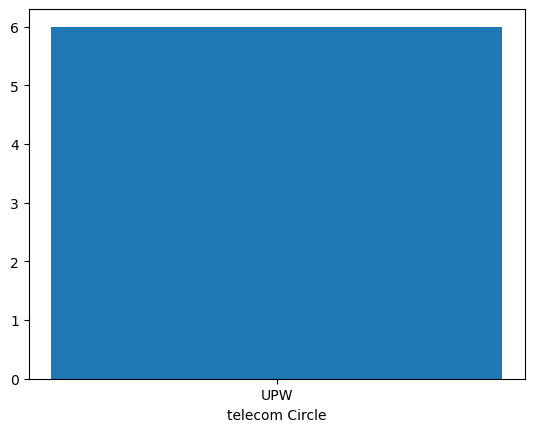

In [57]:
plt.bar(df['pcircle'],df['pcircle'].value_counts(),width = 2)
plt.xlabel('telecom Circle')
plt.show()

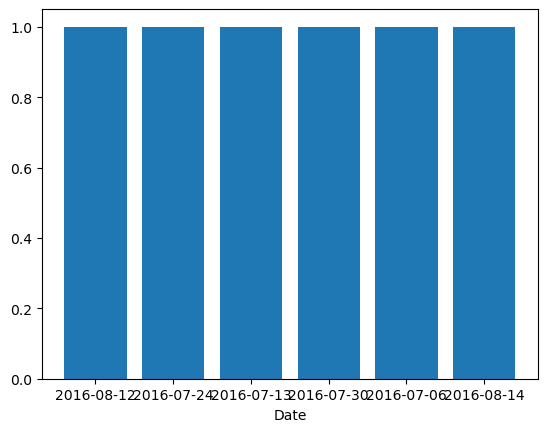

In [61]:
plt.bar(df['pdate'],df['pdate'].value_counts())
plt.xlabel('Date')
plt.show()

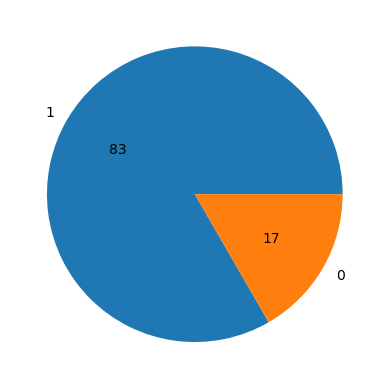

In [63]:
plt.pie(df['label'].value_counts(), labels = df['label'].value_counts().index,autopct = '%0.0f')
plt.show()

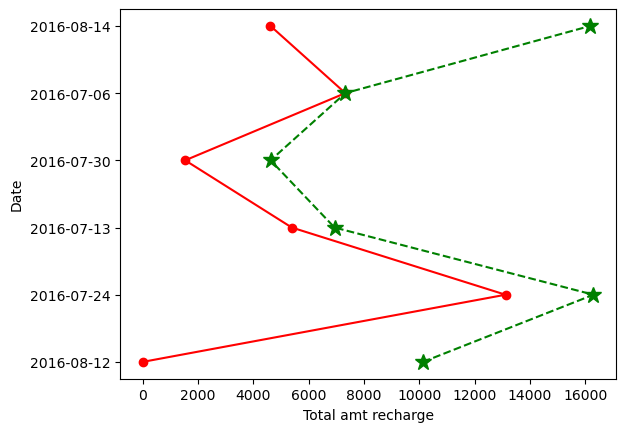

In [64]:
plt.plot(df['sumamnt_ma_rech30'], df['pdate'], color = 'red', marker = 'o', label = 'amt 30days')
plt.plot(df['sumamnt_ma_rech90'], df['pdate'], color = 'green', marker = '*', markersize = 12, linestyle = 'dashed', label = 'amt 90days')
plt.ylabel('Date')
plt.xlabel('Total amt recharge')
plt.show()